<a href="https://colab.research.google.com/github/Sanchita210507/BML-Experiments/blob/main/Experiment_10_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Apply PCA on dataset obtained from UCI ML repository.**

***Dataset Used: Heart Disease Dataset***

*Step 1: Load and prepare the dataset.*

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/heart_disease/processed.cleveland.data'

# Add column names from dataset
columns = [
    'age','sex','cp','trestbps','chol','fbs','restecg',
    'thalach','exang','oldpeak','slope','ca','thal','num'
]

# Load data
df = pd.read_csv(file_path, names=columns, na_values='?')
df = df.dropna()

# Use 'num' as the target column
target = df['num']
data = df.drop(columns=['num'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Step 2: Apply PCA on the dataset*

In [ ]:
# Data standardization
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)
standardized_data = (data - mean) / std_dev

# Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

# Eigen Values and Eigen Vectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort Eigen Values and Select Top k
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors

array([[ 0.28586758,  0.41866153, -0.01261961,  0.12419567,  0.03123119,
        -0.60490431, -0.01953097, -0.12518455,  0.33301471, -0.25119348,
         0.32869113, -0.13706318,  0.20894989],
       [ 0.11680189, -0.431579  ,  0.48369265,  0.2554797 ,  0.15025525,
        -0.02300399, -0.53895838,  0.01019962, -0.22056993, -0.24877202,
         0.13528374, -0.12415037,  0.20719272],
       [ 0.28621211, -0.15253955, -0.40887336,  0.32658925,  0.06591852,
        -0.12953711, -0.34113269, -0.4428583 , -0.03559127,  0.44845459,
        -0.03321693,  0.10476835, -0.2699967 ],
       [ 0.16784082,  0.39151404,  0.31463151, -0.18685395,  0.11444853,
         0.26132766, -0.17185439,  0.03297055, -0.08463981,  0.36336173,
         0.432931  ,  0.4907731 ,  0.07172239],
       [ 0.08350419,  0.42820138, -0.2600399 ,  0.19084194,  0.02741043,
         0.14275303, -0.18867857, -0.04219898, -0.40076951, -0.4200732 ,
        -0.41035697,  0.29293212,  0.23630352],
       [ 0.07609387,  0.239855

*Step 3: Visualize PCA Result*

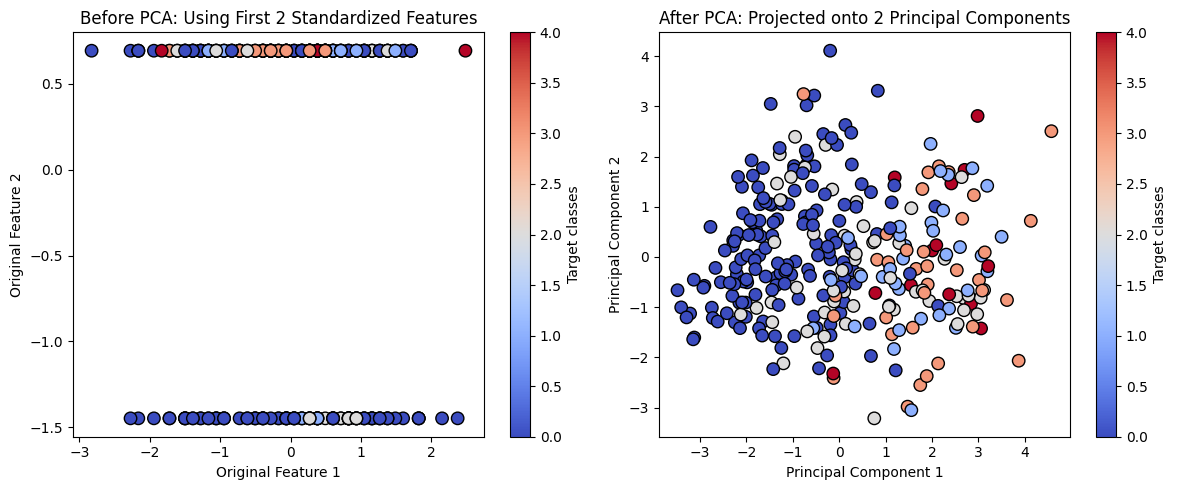

In [ ]:
X_std_np = np.array(standardized_data)

# Project data onto top 2 eigenvectors
X_pca = X_std_np.dot(eigenvectors[:, :2])
y_numeric = pd.factorize(target)[0]

# Plot the results
plt.figure(figsize=(12, 5))

# first plot
plt.subplot(1, 2, 1)
plt.scatter(X_std_np[:, 0], X_std_np[:, 1],
            c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel("Original Feature 1")
plt.ylabel("Original Feature 2")
plt.title("Before PCA: Using First 2 Standardized Features")
plt.colorbar(label="Target classes")

# second plot
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("After PCA: Projected onto 2 Principal Components")
plt.colorbar(label="Target classes")

plt.tight_layout()
plt.show()
